<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/Arya_P_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Case Study Unsupervised Learning***

In [82]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Loading the dataset
data=pd.read_csv('/content/Wine_clust .csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [84]:
# shape of data
data.shape

(178, 13)

*The shape of the data is (178,13), which shows there are 178 rows and 13 columns in the data.*

---



In [85]:
# features in data
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [86]:
# first five rows of the dataset
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
# get some basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


*Data has float and integer values*

---



In [88]:
#statistical summary
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


*Here we get the count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.*

---



**checking missing values**

In [89]:
# checking missing values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No missing values found

---



**Finding Outliers**

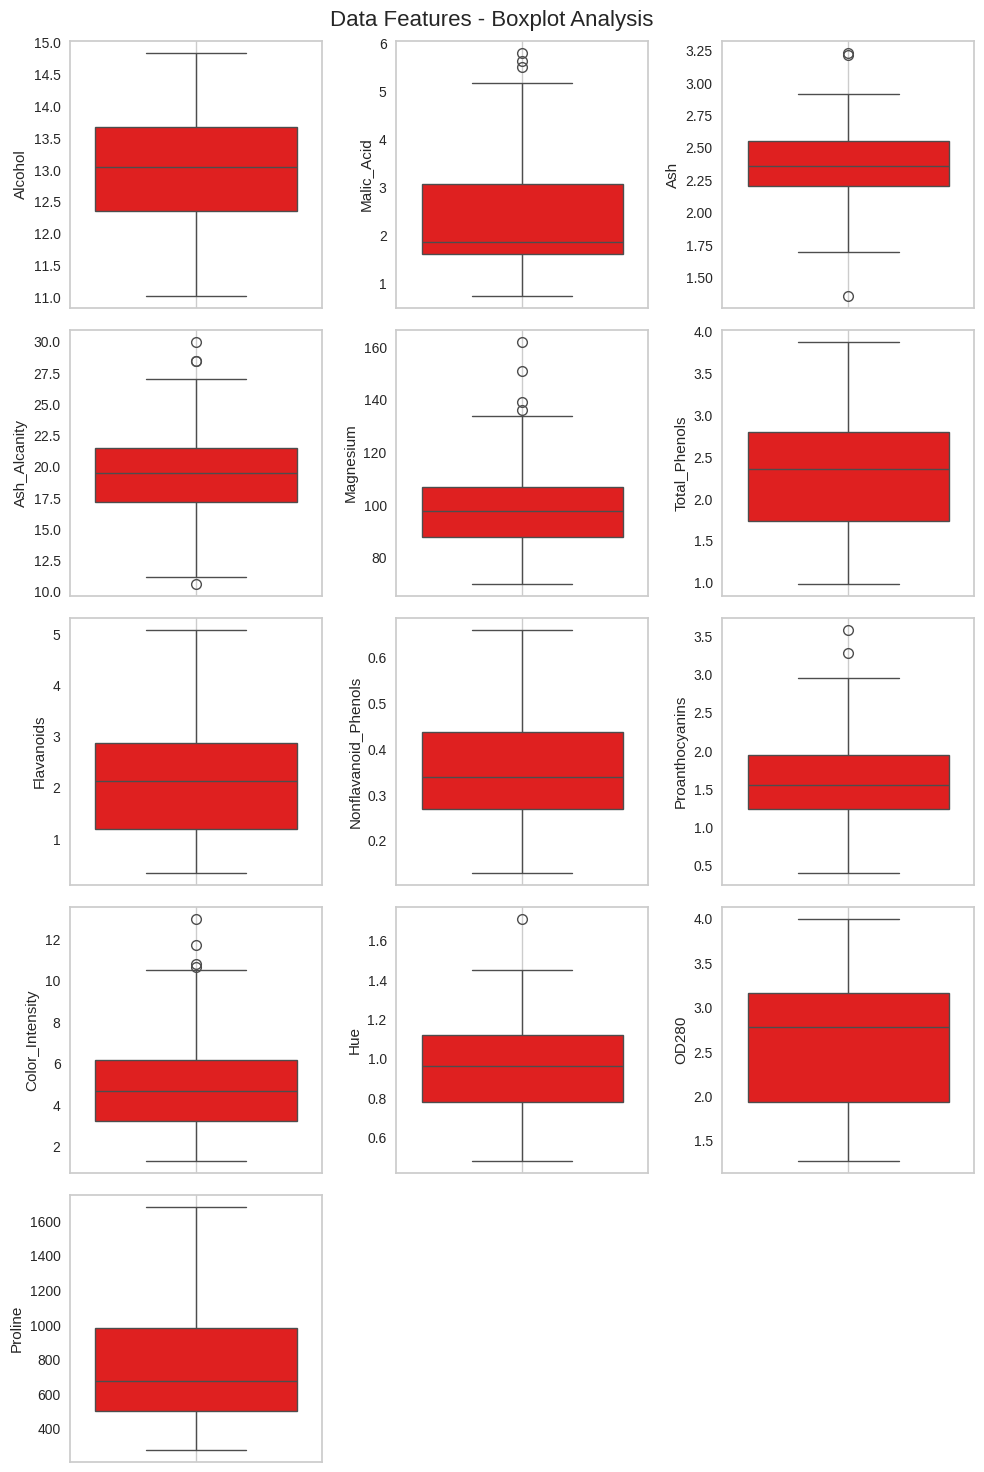

In [90]:
# boxplot
fig=plt.figure(figsize=(10,15))
#plt.title('Data features Box plot Analysis')
for i ,col in enumerate(list(data.columns.values)):
  plt.subplot(5,3,i+1)
  sns.boxplot(data[col],color='red')
  plt.grid()
  fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
  plt.tight_layout();

In [91]:
# Finding outliers  using IQR method
for i in data:
  print('  ', i)

  #Calculating the interquartile range
  Q1 = np.percentile(data[i],25,method='midpoint')
  Q2 = np.percentile(data[i],50,method='midpoint')
  Q3 = np.percentile(data[i],75,method='midpoint')
  IQR =Q3 - Q1

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]

  for x in data[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)


  print('outliers : ',outliers)

  print('--------------------------------------------------------------')





   Alcohol
Q1 is:  12.364999999999998
Q2 is:  13.05
Q3 is:  13.675
IQR = 1.3100000000000023
lower limit =  10.399999999999995
upper limit   15.640000000000004
outliers :  []
--------------------------------------------------------------
   Malic_Acid
Q1 is:  1.605
Q2 is:  1.8650000000000002
Q3 is:  3.065
IQR = 1.46
lower limit =  -0.585
upper limit   5.255
outliers :  [5.8, 5.51, 5.65]
--------------------------------------------------------------
   Ash
Q1 is:  2.21
Q2 is:  2.36
Q3 is:  2.5549999999999997
IQR = 0.34499999999999975
lower limit =  1.6925000000000003
upper limit   3.0724999999999993
outliers :  [3.22, 1.36, 3.23]
--------------------------------------------------------------
   Ash_Alcanity
Q1 is:  17.2
Q2 is:  19.5
Q3 is:  21.5
IQR = 4.300000000000001
lower limit =  10.749999999999998
upper limit   27.950000000000003
outliers :  [10.6, 30.0, 28.5, 28.5]
--------------------------------------------------------------
   Magnesium
Q1 is:  88.0
Q2 is:  98.0
Q3 is:  107.0
IQ

Features  - 'Malic_Acid', 'Ash_Alcanity', 'Magnesium', 'Flavanoids',
'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity' have outliers

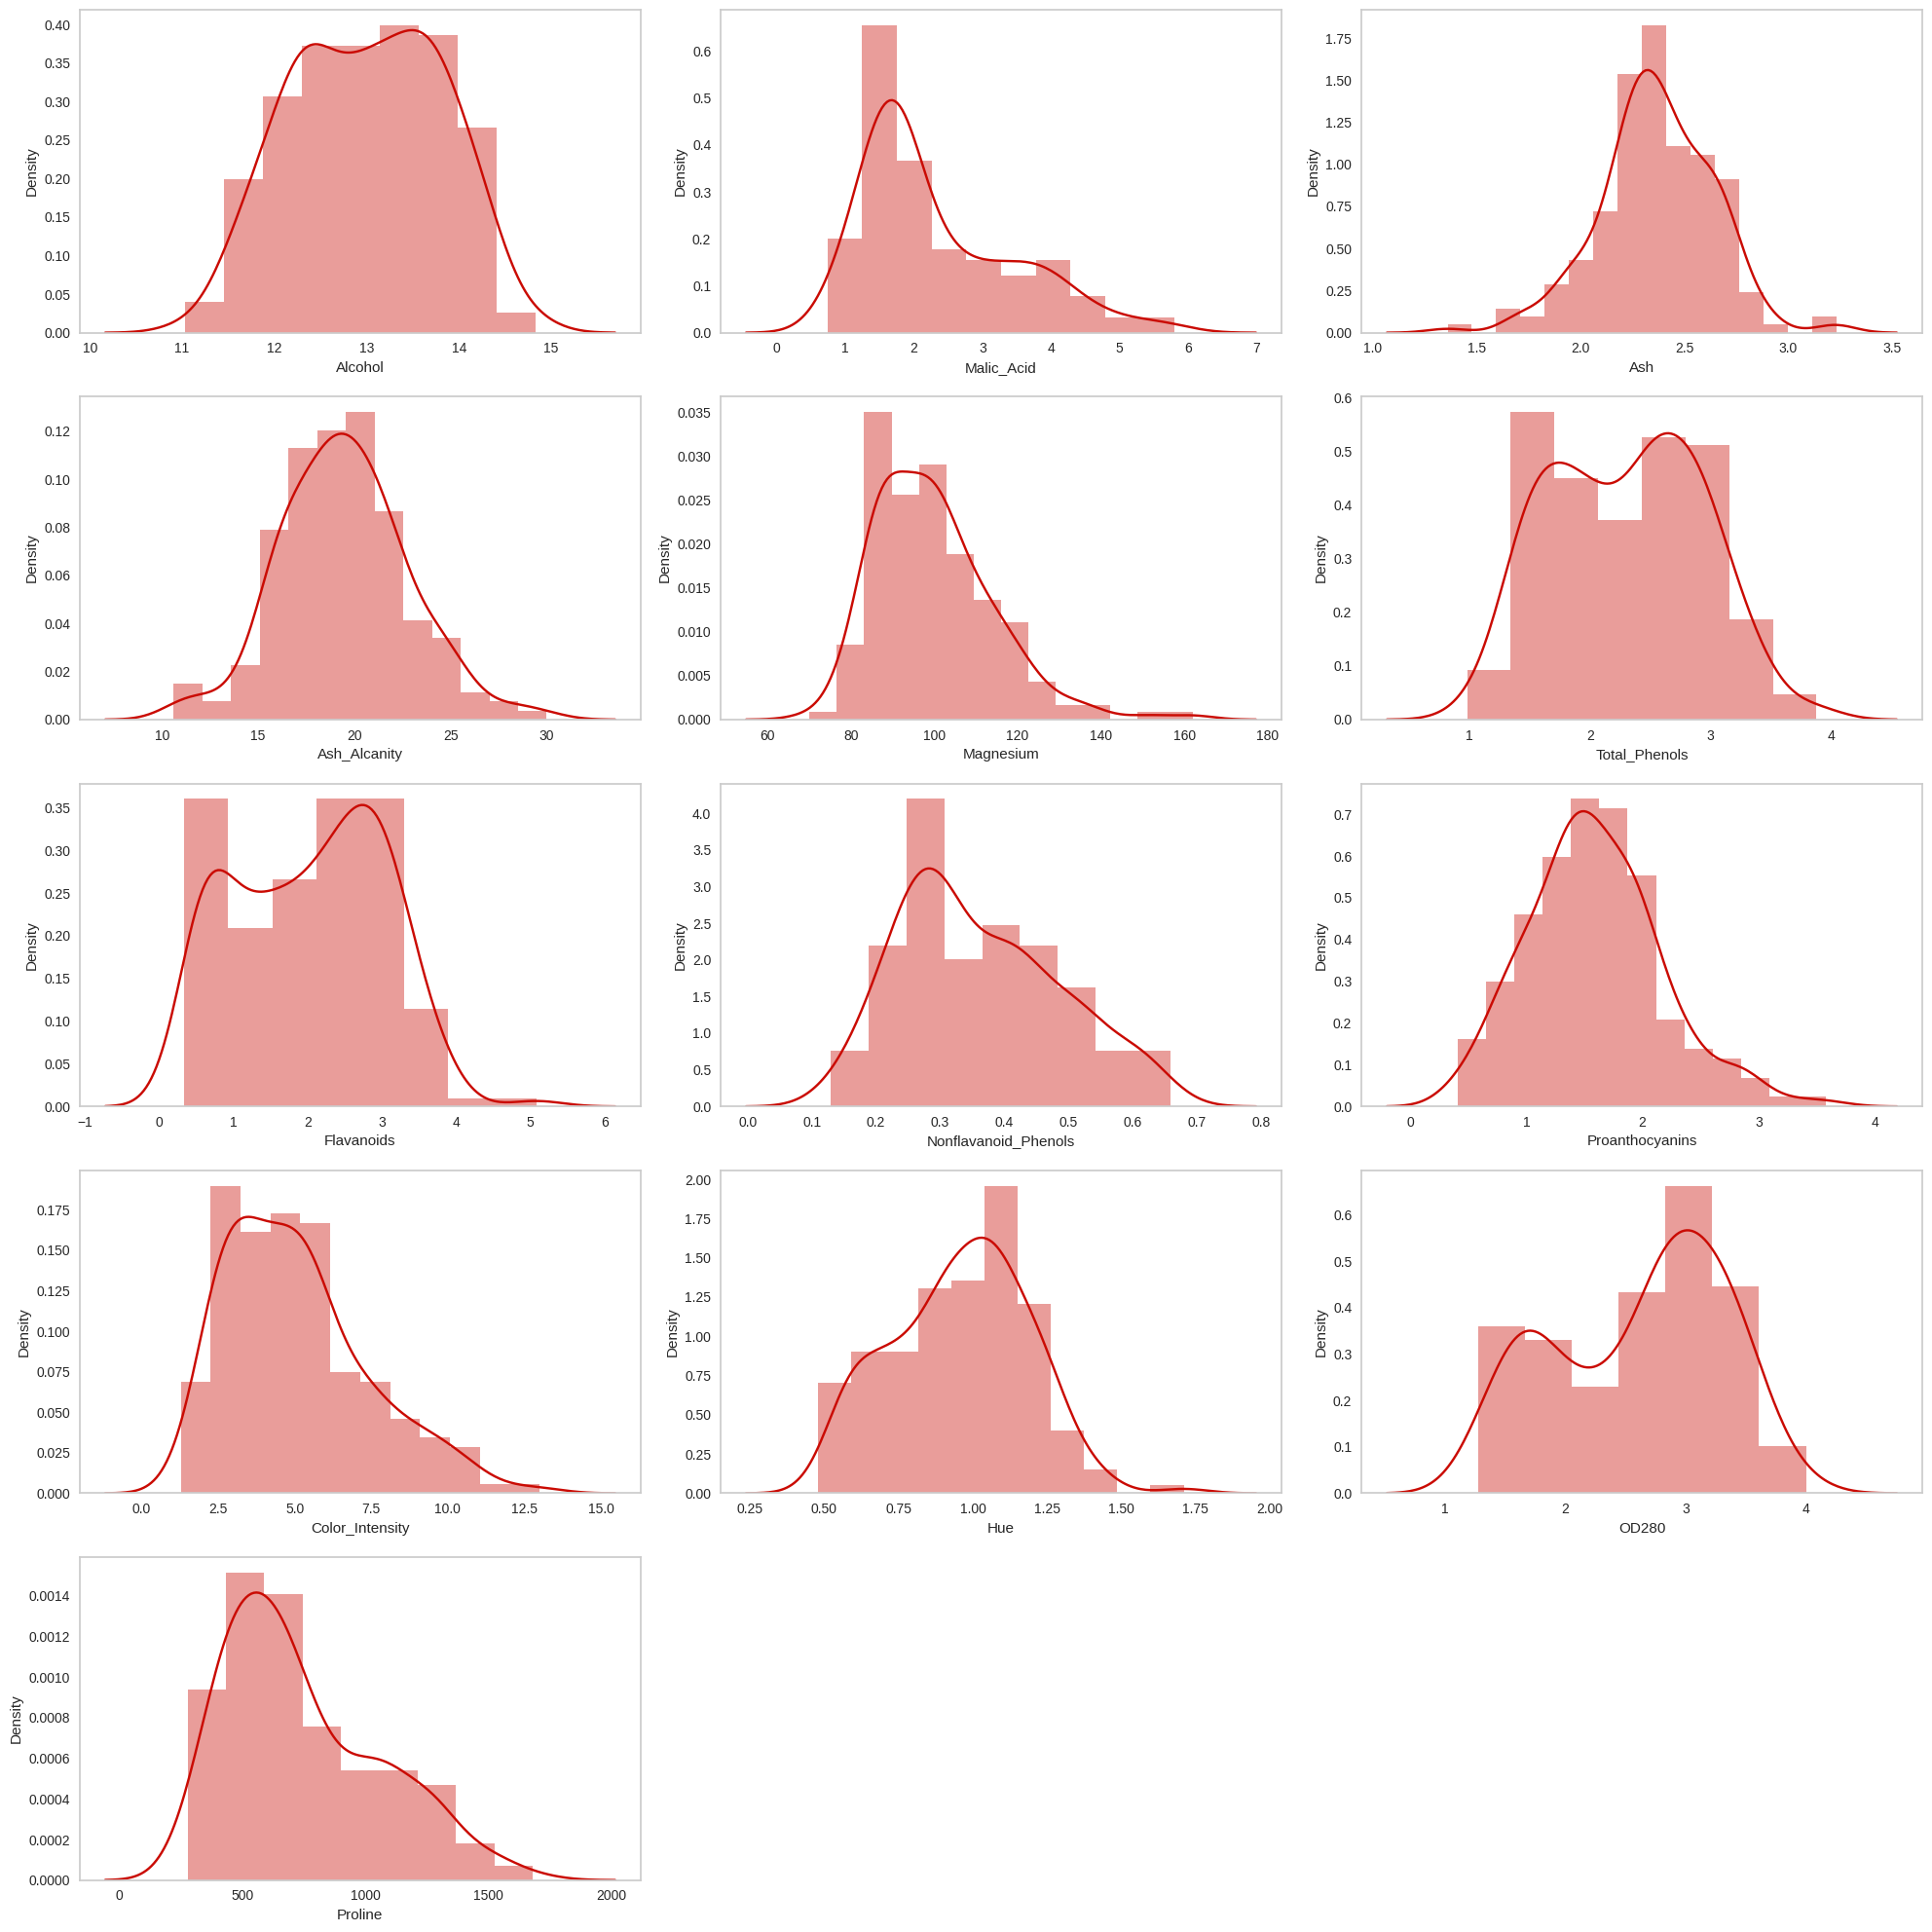

In [92]:
# distplot
plt.figure(figsize=(20,20))
for i ,col in enumerate(data.columns,1):
  plt.subplot(5,3,i)
  sns.distplot(data[col],color='r',kde=True)
  plt.grid()
  fig.suptitle('Data Features - Dist plot Analysis', fontsize=16)
  plt.tight_layout();

**correlation**

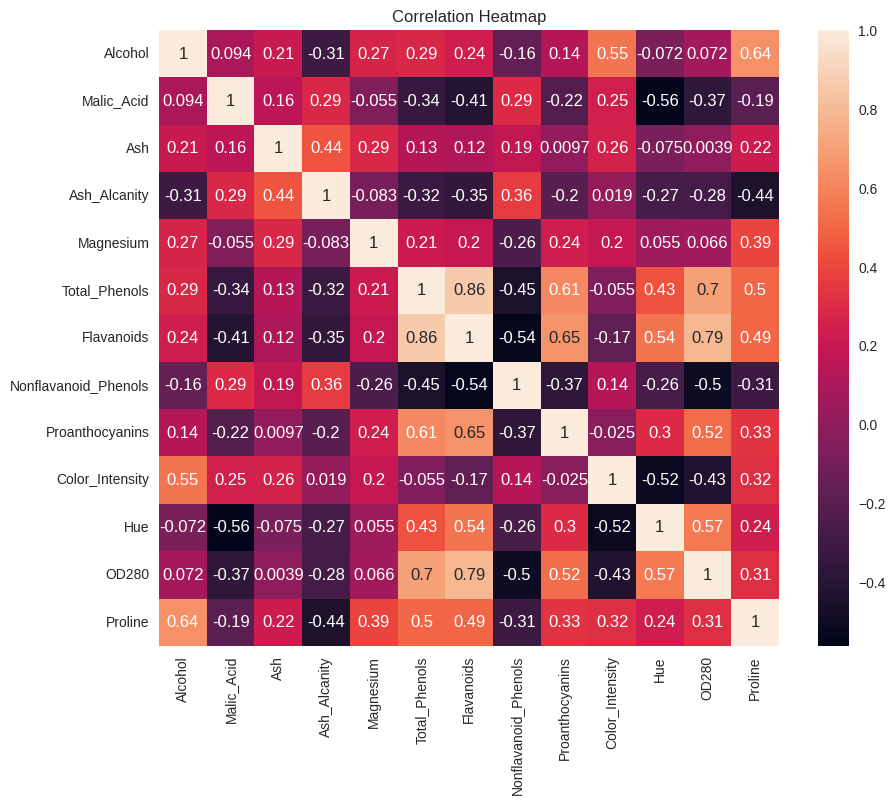

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()



*   *Flavanoids has a strong positive correlation with total phenols, whereas it has a  negative correlation with NonFlavanoid Phenols.*
*   *Flavanoids and OD280 has positive correlation*
*   *Flavanois and color intensity has negative correlation*
*   *Malic acisd and hue has negative correlation*


In [94]:
# drop 'Flavanoids'
data=data.drop('Flavanoids',axis=1)

**Pair plot**

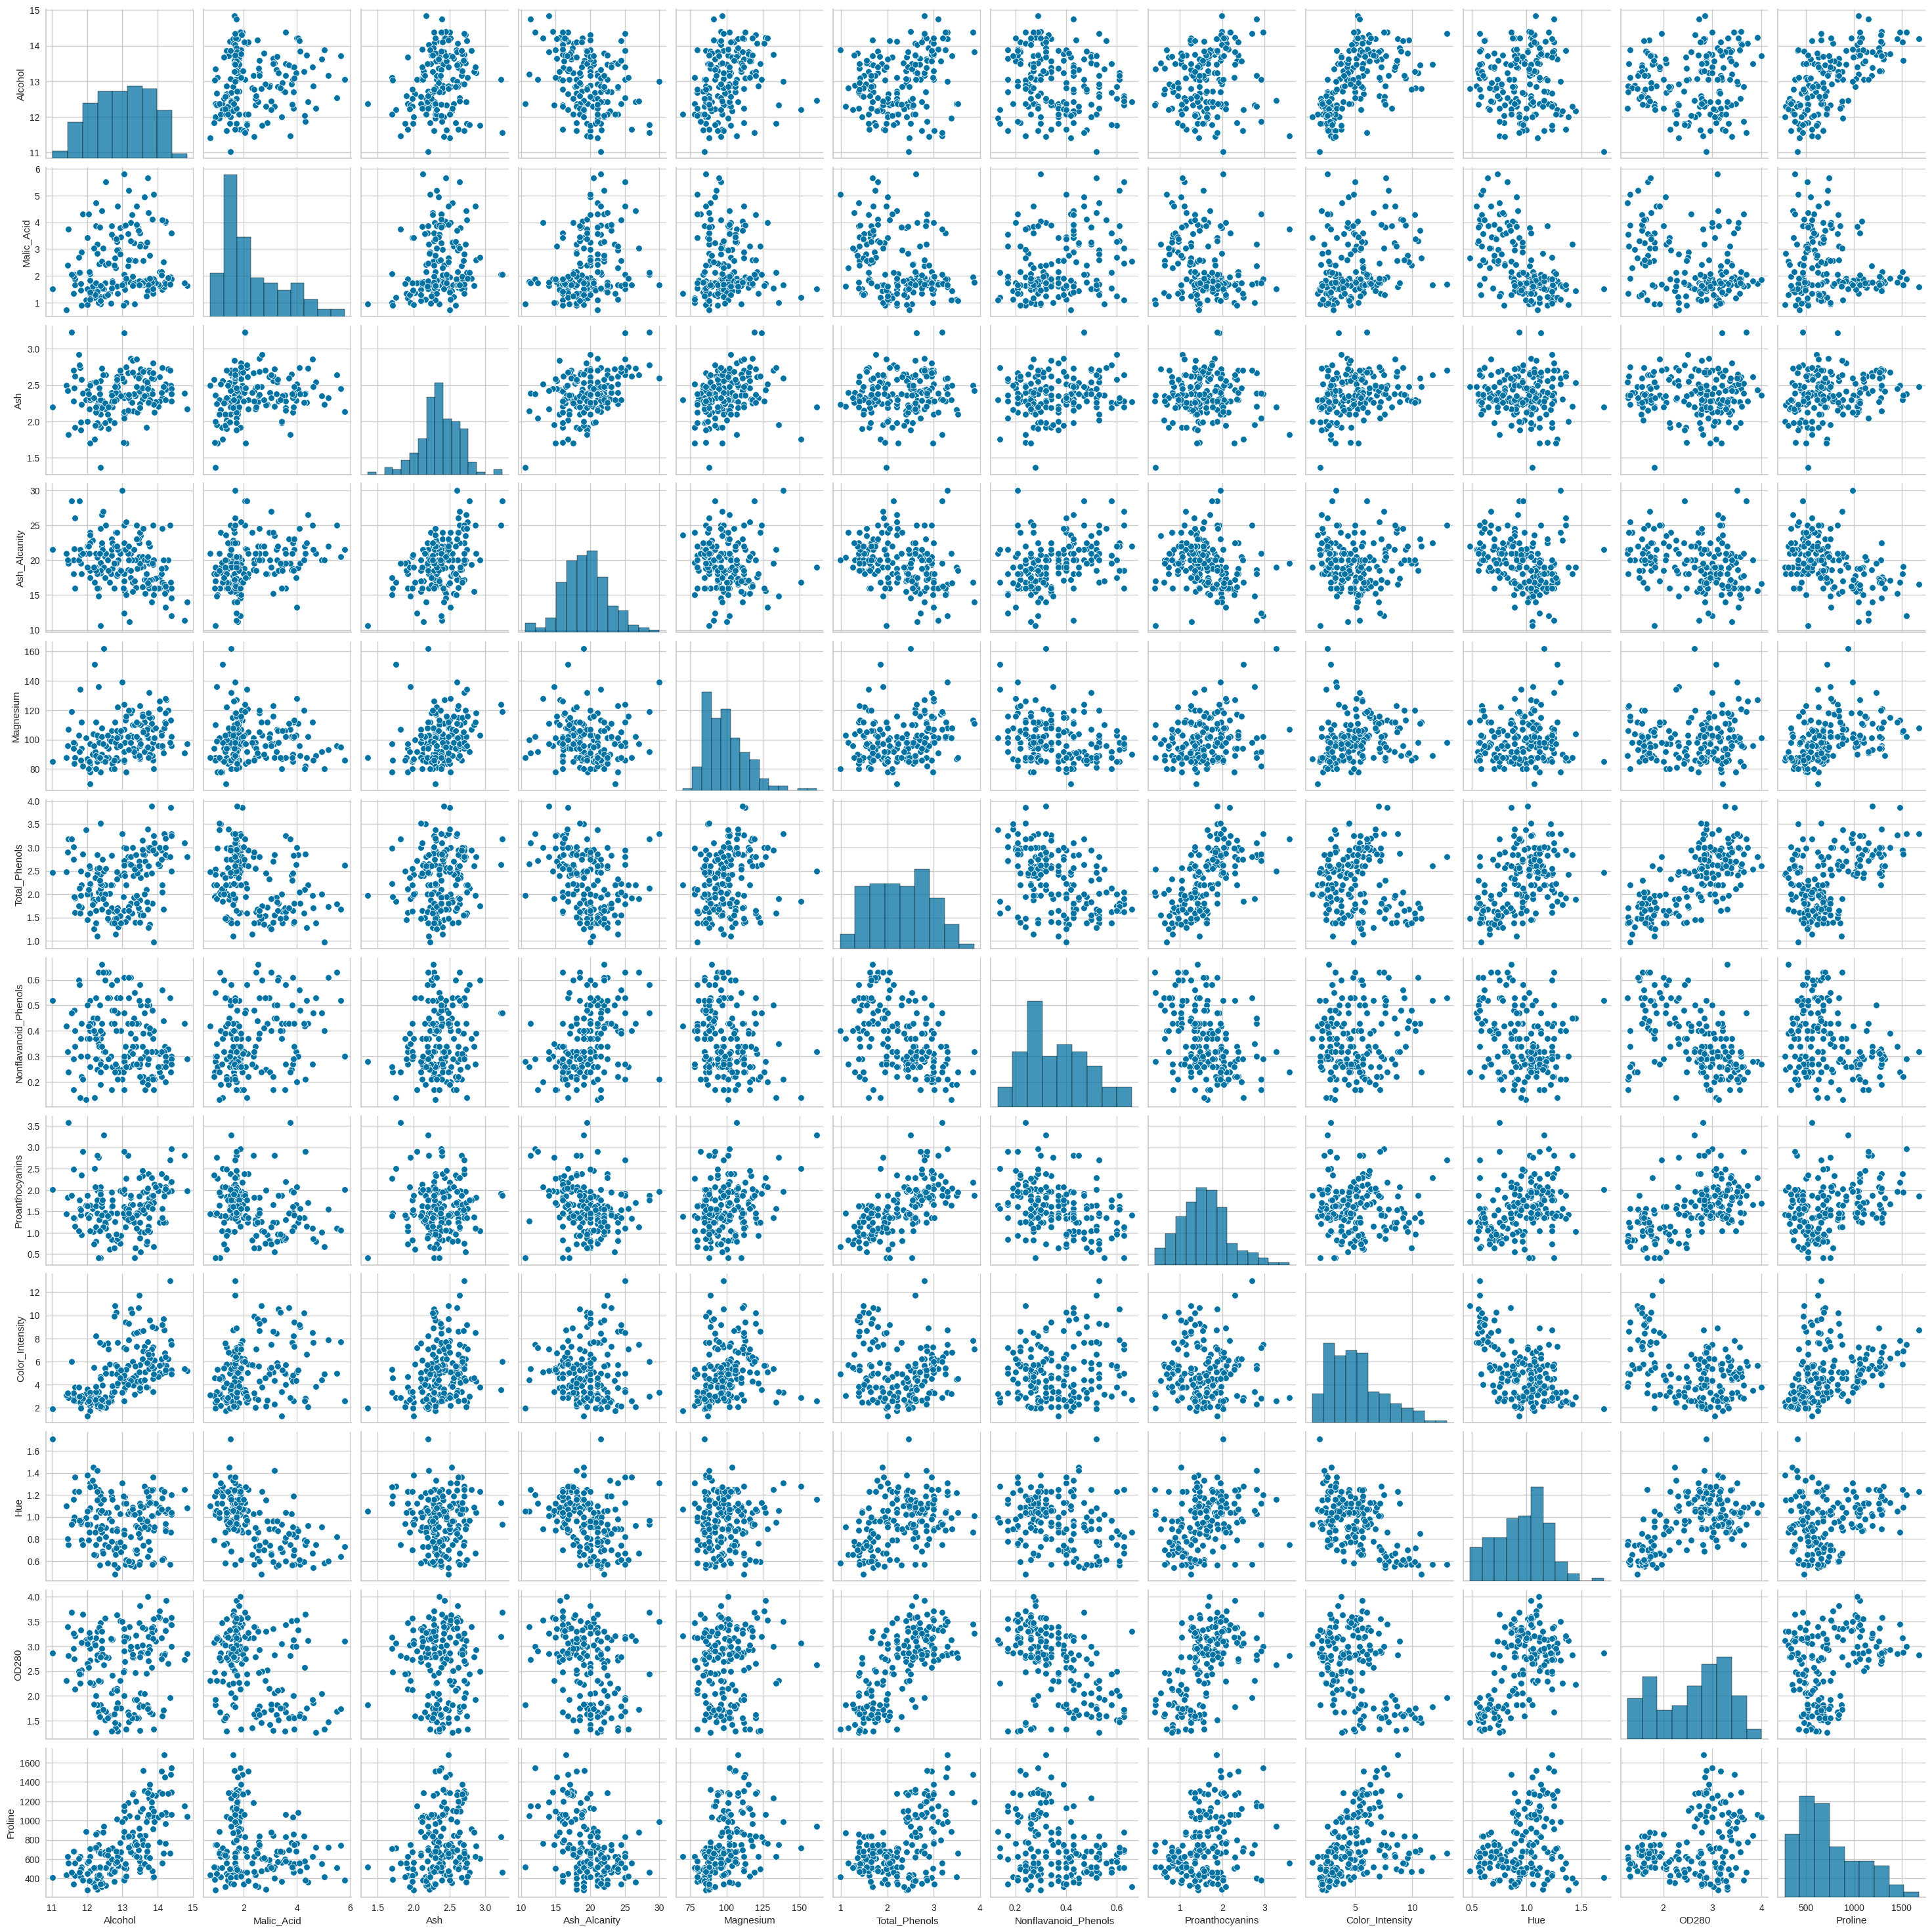

In [95]:
sns.pairplot(data, palette='red')

**Use StandardScaler() to scale each variable to have a mean of 0 and a standard deviation of 1**

In [96]:
#create scaled Data where each variable has mean of 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_data=sc.fit_transform(data)

In [97]:
sc_data=pd.DataFrame(sc_data,columns=data.columns)
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [98]:
x=sc_data.values

**K-means clustering**

In [99]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

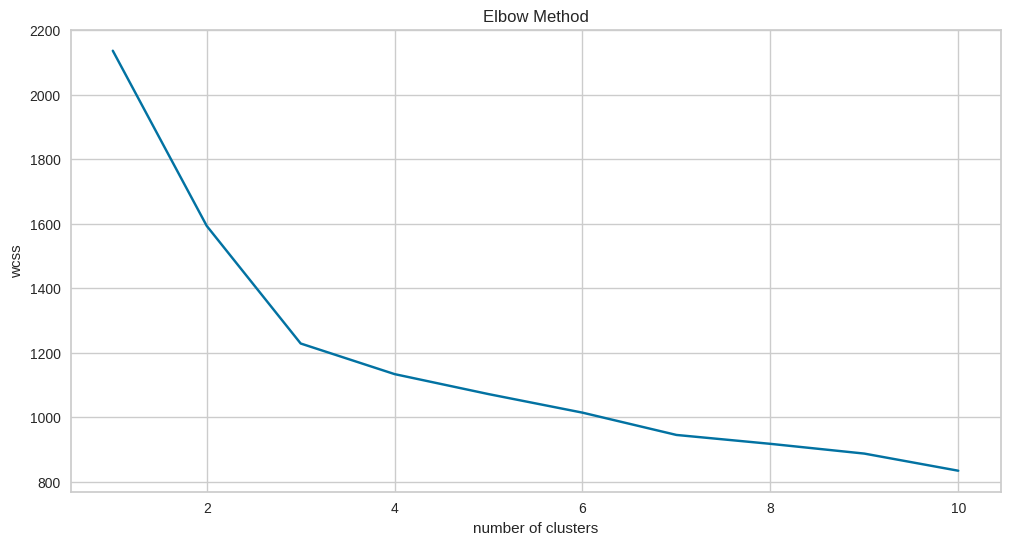

In [100]:
# OPTIMUM NO.OF CLUSTERS NEEDED USING ELBOW METHOD
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [101]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
silhouette_score_avg=silhouette_score(x,y_kmeans)
silhouette_score_avg


0.2773686720689464

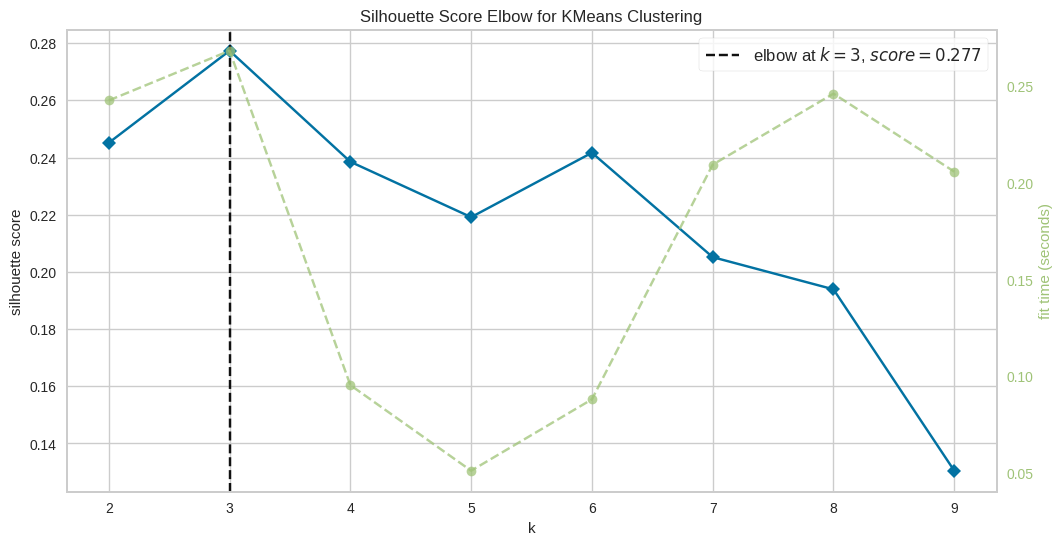

In [128]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()

**AGGLOMERATIVE CLUSTERING**

Text(0.5, 1.0, 'DENDROGRAM')

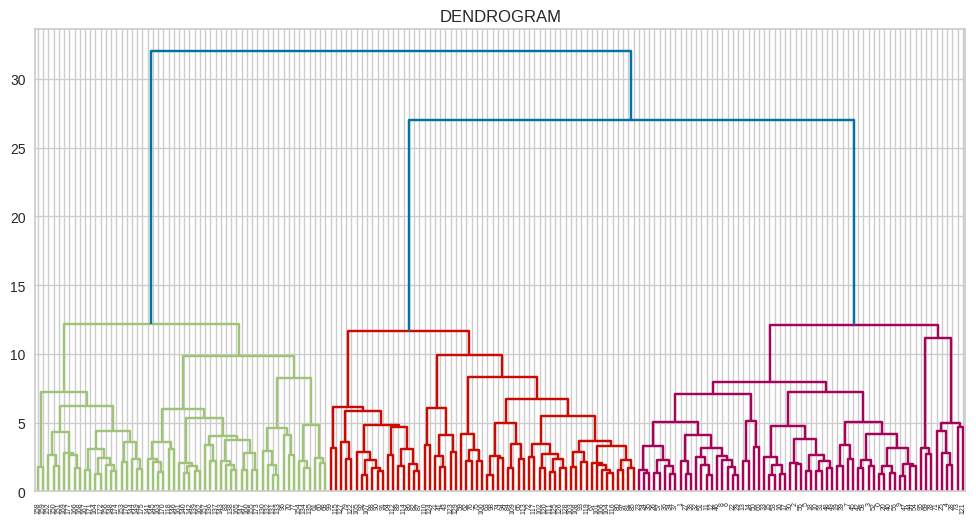

In [105]:
# OPTIMUM NO.OF CLUSTERS NEEDED USING DENDROGRAM METHOD
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('DENDROGRAM')

In [106]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [107]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [108]:
silhouette_score_avg=silhouette_score(x,y_hc)
silhouette_score_avg


0.2603625288950571

**DBSCAN Clustering**

In [113]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

DBSCAN requires ε and minPts parameters for clustering. The minPts parameter is easy to set. The minPts should be 4 for two-dimensional dataset. For multidimensional dataset, minPts should be 2 * number of dimensions. For example, if your dataset has 6 features, set minPts = 12. Sometimes, domain expertise is also required to set a minPts parameter.

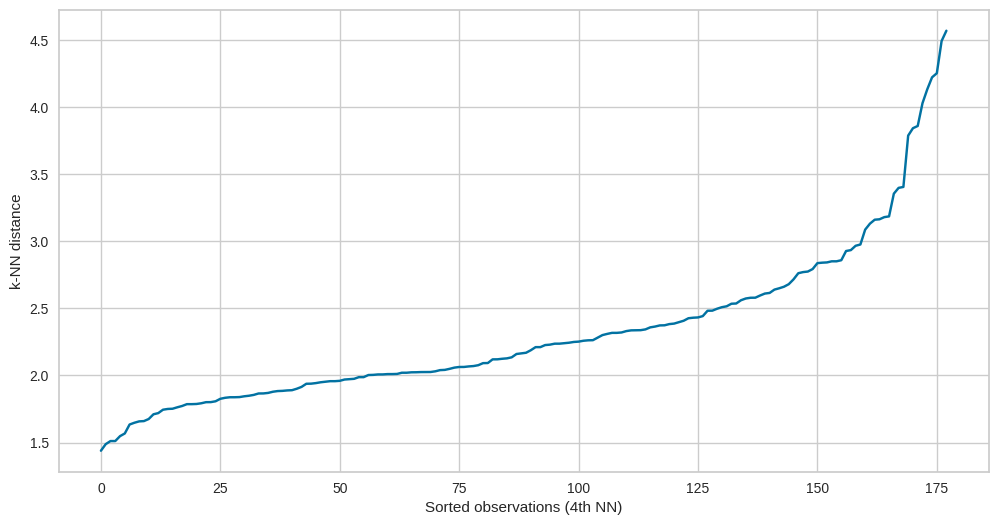

In [114]:
# To determine the optimal ε parameters for two features
k_dist = dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [115]:
 pip install kneed

In [116]:
# get an estimate of knee point
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

3.8442970334423037


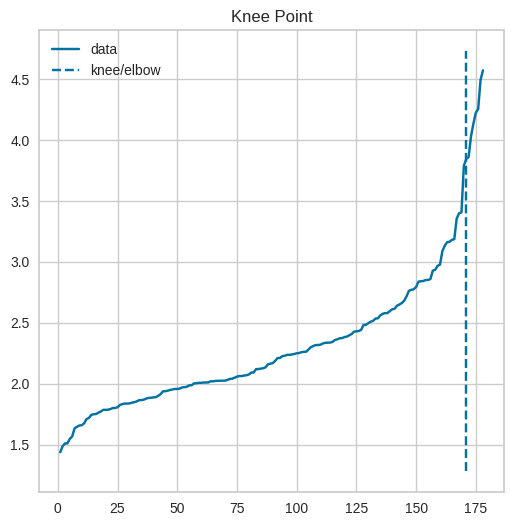

In [117]:
kneedle.plot_knee()
plt.show()

We will use 3.84 as optimum value of ε for DBSCAN clustering

In [118]:
# use 3.84 as optimum value of ε and 4 as minimum samples for DBSCAN clustering
dbscan = DBSCAN(eps=3.84, min_samples=4)
y = dbscan.fit_predict(x)

In [119]:
silhouette_score_avg=silhouette_score(x,y)
silhouette_score_avg


0.23159138260332715

**Compute required parameters for DBSCAN clustering**

*--> for multidimensional dataset(all features)*

In [120]:
from sklearn.model_selection import GridSearchCV

params = {'eps': [0.1, 0.2, 0.3,0.35, 0.4, 0.5], 'min_samples': [3,4, 7, 10, 15,24]}

gcv = GridSearchCV(estimator=dbscan, param_grid=params, cv=10, scoring='adjusted_mutual_info_score', n_jobs=-1)
gcv.fit(x)

GridSearchCV(cv=10, estimator=DBSCAN(eps=3.84, min_samples=4), n_jobs=-1,
             param_grid={'eps': [0.1, 0.2, 0.3, 0.35, 0.4, 0.5],
                         'min_samples': [3, 4, 7, 10, 15, 24]},
             scoring='adjusted_mutual_info_score')

In [121]:
# use 4 as optimum value of ε and 24 as minimum samples for DBSCAN clustering
dbscan = DBSCAN(eps=4, min_samples=24)
y_dbscan = dbscan.fit_predict(x)

In [122]:
silhouette_score_avg=silhouette_score(x,y)
silhouette_score_avg


0.23159138260332715

***PCA***

In [123]:
from sklearn.decomposition import PCA
pca=PCA().fit(x)


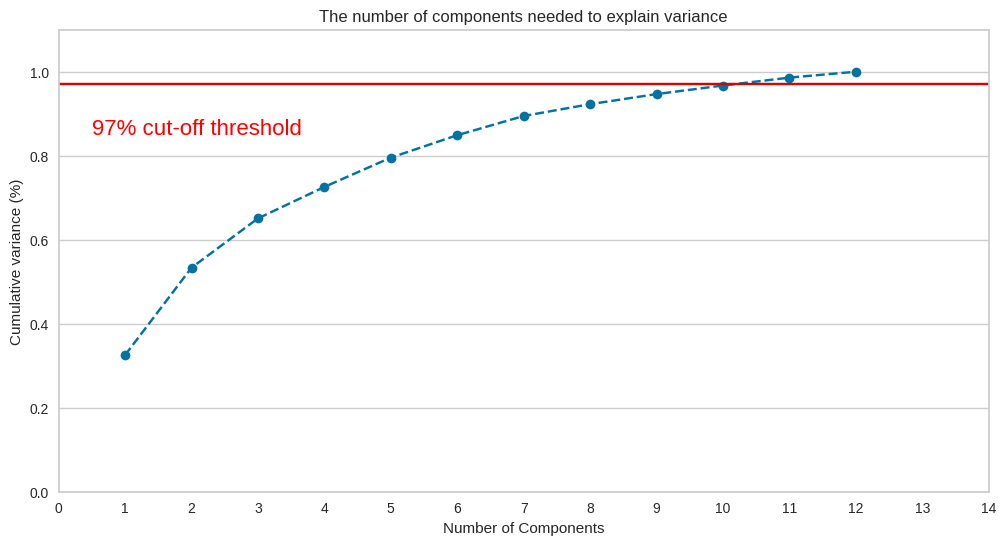

In [124]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [125]:
pca=PCA(n_components=9)
pca.fit(sc_data)
x_pca=pca.transform(x)

In [126]:
pca=PCA(n_components=2)  #considering 2 components

reduced_X=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.195942,-1.433655
1,2.164482,0.341295
2,2.163996,-1.027405
3,3.451585,-2.747487
4,0.743463,-0.870430


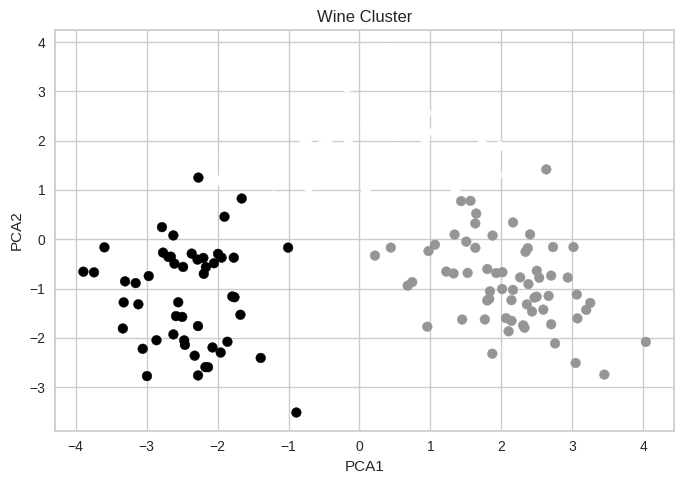

In [127]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()


***Conclusions***




* k- means clustering is better for this wine data, it has better silhouette score compared to other two clustering method
* we got three clusters by k- Means clustering method

---



---


